Forecasting analysis between S6 and ART

In [2]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

print(sys.path)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import matplotlib.pyplot as plt

from ff_scenario import n_obs, obs, robot_radius, safety_margin, goal_region, start_region, iter_max_SCP


traj_data = np.load(root_folder + '/optimization/saved_files/prediction_analysis_S6/pred_analysis_checkpoint_ff_GSA_vs_checkpoint_ff_S6_gsa_test.npz',allow_pickle=True)


['/home/arpit/miniforge3/envs/MAMBA/lib/python310.zip', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/lib-dynload', '', '/home/arpit/.local/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/mamba_ssm-2.2.4-py3.10-linux-x86_64.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools-75.6.0-py3.10.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools/_vendor', '/home/arpit/ART/transformermpc_ral24/freeflyer']


In [3]:
feasibility_list_DT = traj_data['feasibility_list_DT']
trajectory_rmse_list_DT = traj_data['trajectory_rmse_list_DT']
control_error_list_DT = traj_data['control_error_list_DT']
final_state_error_list_DT = traj_data['final_state_error_list_DT']
runtime_list_DT = traj_data['runtime_list_DT']
runtime_scp_list_DT = traj_data['runtime_scp_list_DT']
iter_scp_list_DT = traj_data['iter_scp_list_DT']
J_vect_scp_list_DT = traj_data['J_vect_scp_list_DT']

trajectory_rmse_list_S6 = traj_data['trajectory_rmse_list_S6']
control_error_list_S6 = traj_data['control_error_list_S6']
final_state_error_list_S6 = traj_data['final_state_error_list_S6']
feasibility_list_S6 = traj_data['feasibility_list_S6']
runtime_list_S6 = traj_data['runtime_list_S6']
runtime_scp_list_S6 = traj_data['runtime_scp_list_S6']
iter_scp_list_S6 = traj_data['iter_scp_list_S6']
J_vect_scp_list_S6 = traj_data['J_vect_scp_list_S6']

runtime_list_CVX = traj_data['runtime_list_CVX']


In [7]:
num_true = np.sum(feasibility_list_DT)  # Counts True values (True is 1, False is 0)
num_false = len(feasibility_list_DT) - num_true  # Remaining are False
num_true_S6 = np.sum(feasibility_list_S6)  # Counts True values (True is 1, False is 0)
num_false_S6 = len(feasibility_list_S6) - num_true_S6   # Remaining are False
print(f"#Feasible ART: {num_true}, #Not-Feasible ART: {num_false}")
print(f"#Feasible S6: {num_true_S6}, #Not-Feasible S6: {num_false_S6}")

#Feasible ART: 999, #Not-Feasible ART: 16110
#Feasible S6: 868, #Not-Feasible S6: 16241


In [9]:
combined_feasibility_mask = feasibility_list_DT & feasibility_list_S6 
print(f"Feasible in all models: {np.sum(combined_feasibility_mask)}")

Feasible in all models: 868


In [10]:
# Apply the mask (filter only feasible trajectories)
filtered_trajectory_rmse_DT = trajectory_rmse_list_DT[combined_feasibility_mask]
filtered_control_error_DT = control_error_list_DT[combined_feasibility_mask]
filtered_final_state_error_DT = final_state_error_list_DT[combined_feasibility_mask]
filtered_runtime_DT = runtime_list_DT[combined_feasibility_mask]
filtered_runtime_scp_DT = runtime_scp_list_DT[combined_feasibility_mask]
filtered_iter_scp_DT = iter_scp_list_DT[combined_feasibility_mask]
filtered_J_vect_scp_DT = J_vect_scp_list_DT[combined_feasibility_mask]

filtered_trajectory_rmse_S6 = trajectory_rmse_list_S6[combined_feasibility_mask]
filtered_control_error_S6 = control_error_list_S6[combined_feasibility_mask]
filtered_final_state_error_S6 = final_state_error_list_S6[combined_feasibility_mask]
filtered_runtime_S6 = runtime_list_S6[combined_feasibility_mask]
filtered_runtime_scp_S6 = runtime_scp_list_S6[combined_feasibility_mask]
filtered_iter_scp_S6 = iter_scp_list_S6[combined_feasibility_mask]
filtered_J_vect_scp_S6 = J_vect_scp_list_S6[combined_feasibility_mask]

filtered_runtime_CVX = runtime_list_CVX[combined_feasibility_mask]

print(f" # Feasible Trajectories for ART: {len(filtered_trajectory_rmse_DT)}")
print(f" # Feasible Trajectories for S6: {len(filtered_trajectory_rmse_S6)}")

 # Feasible Trajectories for ART: 868
 # Feasible Trajectories for S6: 868


In [12]:
# ART forecasting analysis
# Calculate mean values for DT
mean_trajectory_rmse_DT = np.mean(filtered_trajectory_rmse_DT)
mean_control_error_DT = np.mean(filtered_control_error_DT)
mean_final_state_error_DT = np.mean(filtered_final_state_error_DT)
mean_runtime_DT = np.mean(filtered_runtime_DT)
mean_runtime_scp_DT = np.mean(filtered_runtime_scp_DT)
mean_iter_scp_DT = np.mean(filtered_iter_scp_DT)
min_J_vect_scp_DT = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_DT])
mean_convergence_cost_DT = np.mean(min_J_vect_scp_DT)

# Calculate mean values for S6
mean_trajectory_rmse_S6 = np.mean(filtered_trajectory_rmse_S6)
mean_control_error_S6 = np.mean(filtered_control_error_S6)
mean_final_state_error_S6 = np.mean(filtered_final_state_error_S6)
mean_runtime_S6 = np.mean(filtered_runtime_S6)
mean_runtime_scp_S6 = np.mean(filtered_runtime_scp_S6)
mean_iter_scp_S6 = np.mean(filtered_iter_scp_S6)
min_J_vect_scp_S6 = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_S6])
mean_convergence_cost_S6 = np.mean(min_J_vect_scp_S6)

mean_runtime_CVX = np.mean(filtered_runtime_CVX)

# Print the results
print("Decision Transformer (DT) Mean Values:")
print(f"Mean Trajectory RMSE: {mean_trajectory_rmse_DT}")
print(f"Mean Control Error: {mean_control_error_DT}")
print(f"Mean Final State Error: {mean_final_state_error_DT}")
print(f"Mean Runtime: {mean_runtime_DT}")
print(f"Mean Runtime SCP: {mean_runtime_scp_DT}")
print(f"Mean Iterations SCP: {mean_iter_scp_DT}")
print(f"Converged cost for DT-SCP: {mean_convergence_cost_DT}")

print("\nS6 Model Mean Values:")
print(f"Mean Trajectory RMSE: {mean_trajectory_rmse_S6}")
print(f"Mean Control Error: {mean_control_error_S6}")
print(f"Mean Final State Error: {mean_final_state_error_S6}")
print(f"Mean Runtime: {mean_runtime_S6}")
print(f"Mean Runtime SCP: {mean_runtime_scp_S6}")
print(f"Mean Iterations SCP: {mean_iter_scp_S6}")
print(f"Converged cost for S6-SCP: {mean_convergence_cost_S6}")

print(f"\nMean Runtime CVX START: {mean_runtime_CVX}")



Decision Transformer (DT) Mean Values:
Mean Trajectory RMSE: 0.011129427079980114
Mean Control Error: 0.0002717742339780941
Mean Final State Error: 0.005094520155740638
Mean Runtime: 0.3260781872107686
Mean Runtime SCP: 3.974341218372644
Mean Iterations SCP: 3.162442396313364
Converged cost for DT-SCP: 0.26262680344236006

S6 Model Mean Values:
Mean Trajectory RMSE: 0.03322813320323237
Mean Control Error: 0.0006879417475807416
Mean Final State Error: 0.005090837573797866
Mean Runtime: 0.3813352431020429
Mean Runtime SCP: 10.910983611636448
Mean Iterations SCP: 5.823732718894009
Converged cost for S6-SCP: 0.26967107138857527

Mean Runtime CVX START: 1.6268338256167927


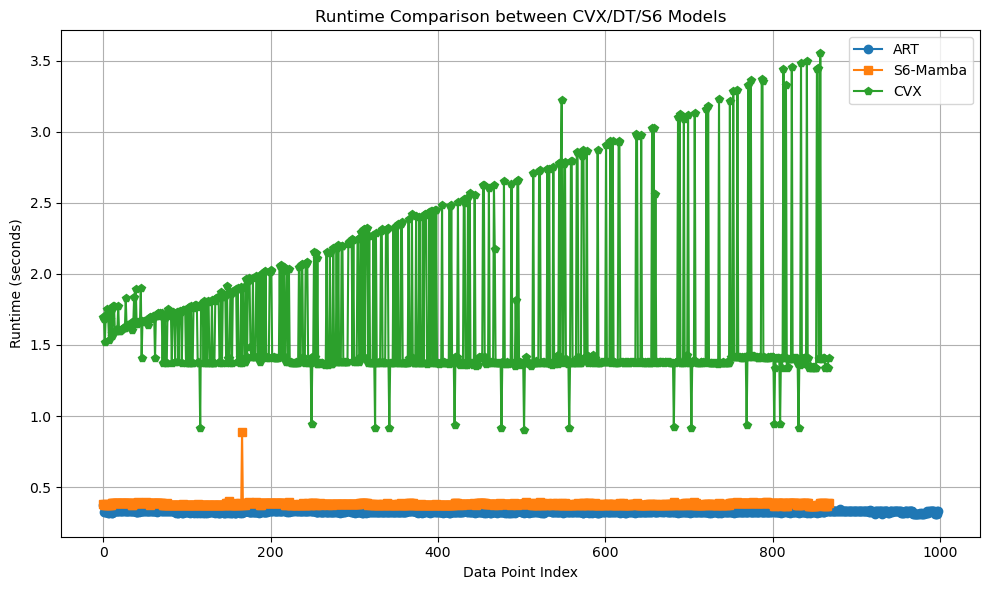

In [54]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
ax.plot(filtered_runtime_DT, label='ART', linestyle='-', marker='o')
# ax.plot(filtered_runtime_scp_DT, label='Runtime SCP DT', linestyle='--', marker='x')
ax.plot(filtered_runtime_S6, label='S6-Mamba', linestyle='-', marker='s')
# ax.plot(filtered_runtime_scp_S6, label='Runtime SCP S6', linestyle='--', marker='d')
ax.plot(filtered_runtime_CVX, label='CVX', linestyle='-', marker='p')

# Adding labels and title
ax.set_xlabel('Data Point Index')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtime Comparison between CVX/DT/S6 Models')

# Adding a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Forecasting Analysis of S4D and ART

In [55]:
import os
import sys

root_folder = os.path.abspath(os.path.dirname(os.getcwd()))
sys.path.append(root_folder)

print(sys.path)

import numpy as np
import numpy.linalg as la
import numpy.matlib as matl
import matplotlib.pyplot as plt

from ff_scenario import n_obs, obs, robot_radius, safety_margin, goal_region, start_region, iter_max_SCP


traj_data_S4 = np.load(root_folder + '/optimization/saved_files/prediction_analysisS4/pred_analysis_checkpoint_ff_GSA_vs_checkpoint_ff_S4_gsa_test.npz',allow_pickle=True)


['/home/arpit/miniforge3/envs/MAMBA/lib/python310.zip', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/lib-dynload', '', '/home/arpit/.local/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/mamba_ssm-2.2.4-py3.10-linux-x86_64.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools-75.6.0-py3.10.egg', '/home/arpit/miniforge3/envs/MAMBA/lib/python3.10/site-packages/setuptools/_vendor', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer', '/home/arpit/ART/transformermpc_ral24/freeflyer']


In [56]:
feasibility_list_DT = traj_data_S4['feasibility_list_DT']
trajectory_rmse_list_DT = traj_data_S4['trajectory_rmse_list_DT']
control_error_list_DT = traj_data_S4['control_error_list_DT']
final_state_error_list_DT = traj_data_S4['final_state_error_list_DT']
runtime_list_DT = traj_data_S4['runtime_list_DT']
runtime_scp_list_DT = traj_data_S4['runtime_scp_list_DT']
iter_scp_list_DT = traj_data_S4['iter_scp_list_DT']
J_vect_scp_list_DT = traj_data_S4['J_vect_scp_list_DT']


trajectory_rmse_list_S4 = traj_data_S4['trajectory_rmse_list_S4']
control_error_list_S4 = traj_data_S4['control_error_list_S4']
final_state_error_list_S4 = traj_data_S4['final_state_error_list_S4']
feasibility_list_S4 = traj_data_S4['feasibility_list_S4']
runtime_list_S4 = traj_data_S4['runtime_list_S4']
runtime_scp_list_S4 = traj_data_S4['runtime_scp_list_S4']
iter_scp_list_S4 = traj_data_S4['iter_scp_list_S4']
J_vect_scp_list_S4 = traj_data_S4['J_vect_scp_list_S4']

runtime_list_CVX = traj_data_S4['runtime_list_CVX']


In [59]:
num_true = np.sum(feasibility_list_DT)  # Counts True values (True is 1, False is 0)
num_false = len(feasibility_list_DT) - num_true  # Remaining are False
num_true_S4 = np.sum(feasibility_list_S4)  # Counts True values (True is 1, False is 0)
num_false_S4 = len(feasibility_list_S4) - num_true_S4   # Remaining are False
print(f"#Feasible ART: {num_true}, #Not-Feasible ART: {num_false}")
print(f"#Feasible S4: {num_true_S4}, #Not-Feasible S4: {num_false_S4}")

#Feasible ART: 996, #Not-Feasible ART: 16113
#Feasible S4: 687, #Not-Feasible S4: 16422


In [60]:
# Apply the mask (filter only feasible trajectories)
filtered_trajectory_rmse_DT = trajectory_rmse_list_DT[feasibility_list_DT]
filtered_control_error_DT = control_error_list_DT[feasibility_list_DT]
filtered_final_state_error_DT = final_state_error_list_DT[feasibility_list_DT]
filtered_runtime_DT = runtime_list_DT[feasibility_list_DT]
filtered_runtime_scp_DT = runtime_scp_list_DT[feasibility_list_DT]
filtered_iter_scp_DT = iter_scp_list_DT[feasibility_list_DT]
filtered_J_vect_scp_DT = J_vect_scp_list_DT[feasibility_list_DT]

filtered_trajectory_rmse_S4 = trajectory_rmse_list_S4[feasibility_list_S4]
filtered_control_error_S4 = control_error_list_S4[feasibility_list_S4]
filtered_final_state_error_S4 = final_state_error_list_S4[feasibility_list_S4]
filtered_runtime_S4 = runtime_list_S4[feasibility_list_S4]
filtered_runtime_scp_S4 = runtime_scp_list_S4[feasibility_list_S4]
filtered_iter_scp_S4 = iter_scp_list_S4[feasibility_list_S4]
filtered_J_vect_scp_S4 = J_vect_scp_list_S4[feasibility_list_S4]

filtered_runtime_CVX_S4 = runtime_list_CVX[feasibility_list_S4]

print(f" # Feasible Trajectories for ART: {len(filtered_trajectory_rmse_DT)}")
print(f" # Feasible Trajectories for S4: {len(filtered_trajectory_rmse_S4)}")

 # Feasible Trajectories for ART: 996
 # Feasible Trajectories for S4: 687


In [61]:
# ART forecasting analysis
# Calculate mean values for DT
mean_trajectory_rmse_DT = np.mean(filtered_trajectory_rmse_DT)
mean_control_error_DT = np.mean(filtered_control_error_DT)
mean_final_state_error_DT = np.mean(filtered_final_state_error_DT)
mean_runtime_DT = np.mean(filtered_runtime_DT)
mean_runtime_scp_DT = np.mean(filtered_runtime_scp_DT)
mean_iter_scp_DT = np.mean(filtered_iter_scp_DT)
min_J_vect_scp_DT = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_DT])
mean_convergence_cost_DT = np.mean(min_J_vect_scp_DT)

# Calculate mean values for S4
mean_trajectory_rmse_S4 = np.mean(filtered_trajectory_rmse_S4)
mean_control_error_S4 = np.mean(filtered_control_error_S4)
mean_final_state_error_S4 = np.mean(filtered_final_state_error_S4)
mean_runtime_S4 = np.mean(filtered_runtime_S4)
mean_runtime_scp_S4 = np.mean(filtered_runtime_scp_S4)
mean_iter_scp_S4 = np.mean(filtered_iter_scp_S4)
min_J_vect_scp_S4 = np.array([np.min(j_vect) for j_vect in filtered_J_vect_scp_S4])
mean_convergence_cost_S4 = np.mean(min_J_vect_scp_S4)

mean_runtime_CVX_S4 = np.mean(filtered_runtime_CVX_S4)

# Print the results
print("Decision Transformer (DT) Mean Values:")
print(f"Mean Trajectory RMSE: {mean_trajectory_rmse_DT}")
print(f"Mean Control Error: {mean_control_error_DT}")
print(f"Mean Final State Error: {mean_final_state_error_DT}")
print(f"Mean Runtime: {mean_runtime_DT}")
print(f"Mean Runtime SCP: {mean_runtime_scp_DT}")
print(f"Mean Iterations SCP: {mean_iter_scp_DT}")
print(f"Converged cost for DT-SCP: {mean_convergence_cost_DT}")

print("\nS4 Model Mean Values:")
print(f"Mean Trajectory RMSE: {mean_trajectory_rmse_S4}")
print(f"Mean Control Error: {mean_control_error_S4}")
print(f"Mean Final State Error: {mean_final_state_error_S4}")
print(f"Mean Runtime: {mean_runtime_S4}")
print(f"Mean Runtime SCP: {mean_runtime_scp_S4}")
print(f"Mean Iterations SCP: {mean_iter_scp_S4}")
print(f"Converged cost for S4-SCP: {mean_convergence_cost_S4}")

print(f"\nMean Runtime CVX START: {mean_runtime_CVX_S4}")


Decision Transformer (DT) Mean Values:
Mean Trajectory RMSE: 0.013029769213656492
Mean Control Error: 0.0003521394489233003
Mean Final State Error: 0.005149767418119889
Mean Runtime: 0.30974700723785953
Mean Runtime SCP: 3.8316138372363815
Mean Iterations SCP: 3.1194779116465865
Converged cost for DT-SCP: 0.26793718810988976

S4 Model Mean Values:
Mean Trajectory RMSE: 0.01593475399086842
Mean Control Error: 0.00037047034946327935
Mean Final State Error: 0.005105152680983973
Mean Runtime: 0.33807289444202937
Mean Runtime SCP: 10.896602367556598
Mean Iterations SCP: 6.528384279475983
Converged cost for S4-SCP: 0.24170108716226946

Mean Runtime CVX START: 1.5996017372764355


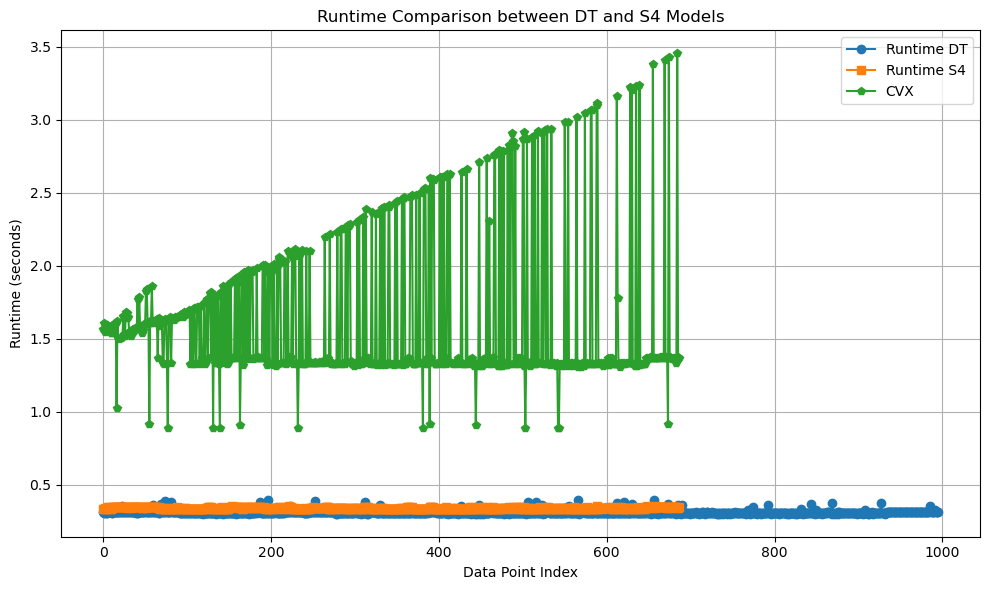

In [62]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the data
ax.plot(filtered_runtime_DT, label='Runtime DT', linestyle='-', marker='o')
# ax.plot(filtered_runtime_scp_DT, label='Runtime SCP DT', linestyle='--', marker='x')
ax.plot(filtered_runtime_S4, label='Runtime S4', linestyle='-', marker='s')
# ax.plot(filtered_runtime_scp_S4, label='Runtime SCP S4', linestyle='--', marker='d')
ax.plot(filtered_runtime_CVX_S4, label='CVX', linestyle='-', marker='p')


# Adding labels and title
ax.set_xlabel('Data Point Index')
ax.set_ylabel('Runtime (seconds)')
ax.set_title('Runtime Comparison between DT and S4 Models')

# Adding a legend
ax.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()